In [25]:
# importing all the required python libraries & packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from datetime import date, datetime

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
# Importing & reading the main dataset
df = pd.read_csv('Data/curated_data.csv')
df.head()

,Date,data1,data2,data3,Website units sold,FB_Ad _spend,FB_Impressions,FB_Unique Clicks,Day,Month,...,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Amazon Page Views,Amazon Sessions,Amazon Units Sold
0,5/3/22,NaN,NaN,NaN,13.0,540.45,38915,208,3.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,487,365,52.0
1,5/4/22,NaN,NaN,NaN,16.0,548.41,42258,192,4.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,439,308,50.0
2,5/5/22,NaN,NaN,NaN,7.0,285.47,21238,96,5.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,357,277,38.0
3,5/6/22,NaN,NaN,NaN,0.0,0,0,0,6.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,370,264,27.0
4,5/7/22,NaN,NaN,NaN,1.0,56.12,4253,9,7.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,306,231,32.0


In [28]:
df.shape

(855, 23)

We can notice that we have blank columns and checked for duplicates

In [29]:
df = df.drop(columns=['data1','data2','data3'])

In [30]:
df.drop_duplicates(keep=False)

,Date,Website units sold,FB_Ad _spend,FB_Impressions,FB_Unique Clicks,Day,Month,Year,day of the week,quarter,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Amazon Page Views,Amazon Sessions,Amazon Units Sold
0,5/3/22,13.0,540.45,38915,208,3.0,5.0,2022.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,487,365,52.0
1,5/4/22,16.0,548.41,42258,192,4.0,5.0,2022.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,439,308,50.0
2,5/5/22,7.0,285.47,21238,96,5.0,5.0,2022.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,357,277,38.0
3,5/6/22,0.0,0,0,0,6.0,5.0,2022.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,370,264,27.0
4,5/7/22,1.0,56.12,4253,9,7.0,5.0,2022.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,306,231,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2/10/23,107.0,2464.18,163244,1011,10.0,2.0,2023.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,156.0
284,2/11/23,98.0,2381.72,140133,1036,11.0,2.0,2023.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,964,733,123.0
285,2/12/23,84.0,1809.46,91056,706,12.0,2.0,2023.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,911,674,117.0
286,2/13/23,66.0,1622.82,101713,697,13.0,2.0,2023.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,934,710,137.0


In [31]:
df = df.fillna(0)
df.isnull().values.any()

False

The data looks clean. Let's check the info

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                855 non-null    object 
 1   Website units sold  855 non-null    float64
 2   FB_Ad _spend        855 non-null    object 
 3   FB_Impressions      855 non-null    object 
 4   FB_Unique Clicks    855 non-null    object 
 5   Day                 855 non-null    float64
 6   Month               855 non-null    float64
 7   Year                855 non-null    float64
 8   day of the week     855 non-null    float64
 9   quarter             855 non-null    float64
 10  Monday              855 non-null    float64
 11  Tuesday             855 non-null    float64
 12  Wednesday           855 non-null    float64
 13  Thursday            855 non-null    float64
 14  Friday              855 non-null    float64
 15  Saturday            855 non-null    float64
 16  Sunday  

Date is an object but since the curated data already has the fragmented date columns we can drop it. 

In [67]:
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# df = df.drop(columns=['Date'])
# Replace column names
df.rename(columns={"Website units sold":"Website_Units_Sold","FB_Ad _spend":"FB_Ad_spend","FB_Unique Clicks":"FB_Unique_Clicks", "Amazon Page Views":"Amazon_Page_Views", "Amazon Sessions":"Amazon_Sessions","Amazon Units Sold":"Amazon_Units_Sold"}, errors = "raise")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Website units sold     855 non-null    float64
 1   FB_Ad _spend           253 non-null    float64
 2   FB_Impressions         253 non-null    float64
 3   FB_Unique Clicks       252 non-null    float64
 4   Day                    855 non-null    float64
 5   Month                  855 non-null    float64
 6   Year                   855 non-null    float64
 7   day of the week        855 non-null    float64
 8   quarter                855 non-null    float64
 9   Monday                 855 non-null    float64
 10  Tuesday                855 non-null    float64
 11  Wednesday              855 non-null    float64
 12  Thursday               855 non-null    float64
 13  Friday                 855 non-null    float64
 14  Saturday               855 non-null    float64
 15  Sunday

In [34]:
df['Amazon Page Views'] = df['Amazon Page Views'].str.replace(',','').astype(float)


In [35]:

df['Amazon Sessions'] = df['Amazon Sessions'].str.replace(',','').astype(float)
df['FB_Ad _spend'] = df['FB_Ad _spend'].str.replace(',','').astype(float)
df['FB_Impressions'] = df['FB_Impressions'].str.replace(',','').astype(float)
df['FB_Unique Clicks'] = df['FB_Unique Clicks'].str.replace(',','').astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Website units sold  855 non-null    float64
 1   FB_Ad _spend        253 non-null    float64
 2   FB_Impressions      253 non-null    float64
 3   FB_Unique Clicks    252 non-null    float64
 4   Day                 855 non-null    float64
 5   Month               855 non-null    float64
 6   Year                855 non-null    float64
 7   day of the week     855 non-null    float64
 8   quarter             855 non-null    float64
 9   Monday              855 non-null    float64
 10  Tuesday             855 non-null    float64
 11  Wednesday           855 non-null    float64
 12  Thursday            855 non-null    float64
 13  Friday              855 non-null    float64
 14  Saturday            855 non-null    float64
 15  Sunday              855 non-null    float64
 16  Amazon P

EXPLORATORY DATA ANALYSIS


In [36]:
# create explanatory variables
df['FB_Click_Through_Rate'] = df['FB_Impressions'] / df['FB_Unique Clicks']

# first_sale_date = data['Date'].min()
# data['Days_Since_First_Sale'] = (data['Date'] - first_sale_date).dt.days

# days_in_month = data['Date'].dt.days_in_month
# data['Days_To_End_Of_Month'] = days_in_month - data['Day']

# data['Sales_In_Last_Week'] = data['Amazon Units Sold'].rolling(window=7).mean()

# data['Quarter_Sales'] = data.groupby(['Year', 'quarter'])['Amazon Units Sold'].transform('sum')

# # data['Sales_In_Last_Month'] = data['Amazon Units Sold'].rolling(window=30).mean()

In [52]:
columns = df.columns.tolist()
print(columns)
corr_matrix = df[['Website Units Sold','FB_Ad_Spend']]
print(corr_matrix)

['Website units sold', 'FB_Ad _spend', 'FB_Impressions', 'FB_Unique Clicks', 'Day', 'Month', 'Year', 'day of the week', 'quarter', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Amazon Page Views', 'Amazon Sessions', 'Amazon Units Sold', 'FB_Click_Through_Rate']
     Website units sold  FB_Ad _spend  FB_Impressions  FB_Unique Clicks  Day  \
0                  13.0        540.45         38915.0             208.0  3.0   
1                  16.0        548.41         42258.0             192.0  4.0   
2                   7.0        285.47         21238.0              96.0  5.0   
3                   0.0          0.00             0.0               0.0  6.0   
4                   1.0         56.12          4253.0               9.0  7.0   
..                  ...           ...             ...               ...  ...   
850                 0.0           NaN             NaN               NaN  0.0   
851                 0.0           NaN             NaN            

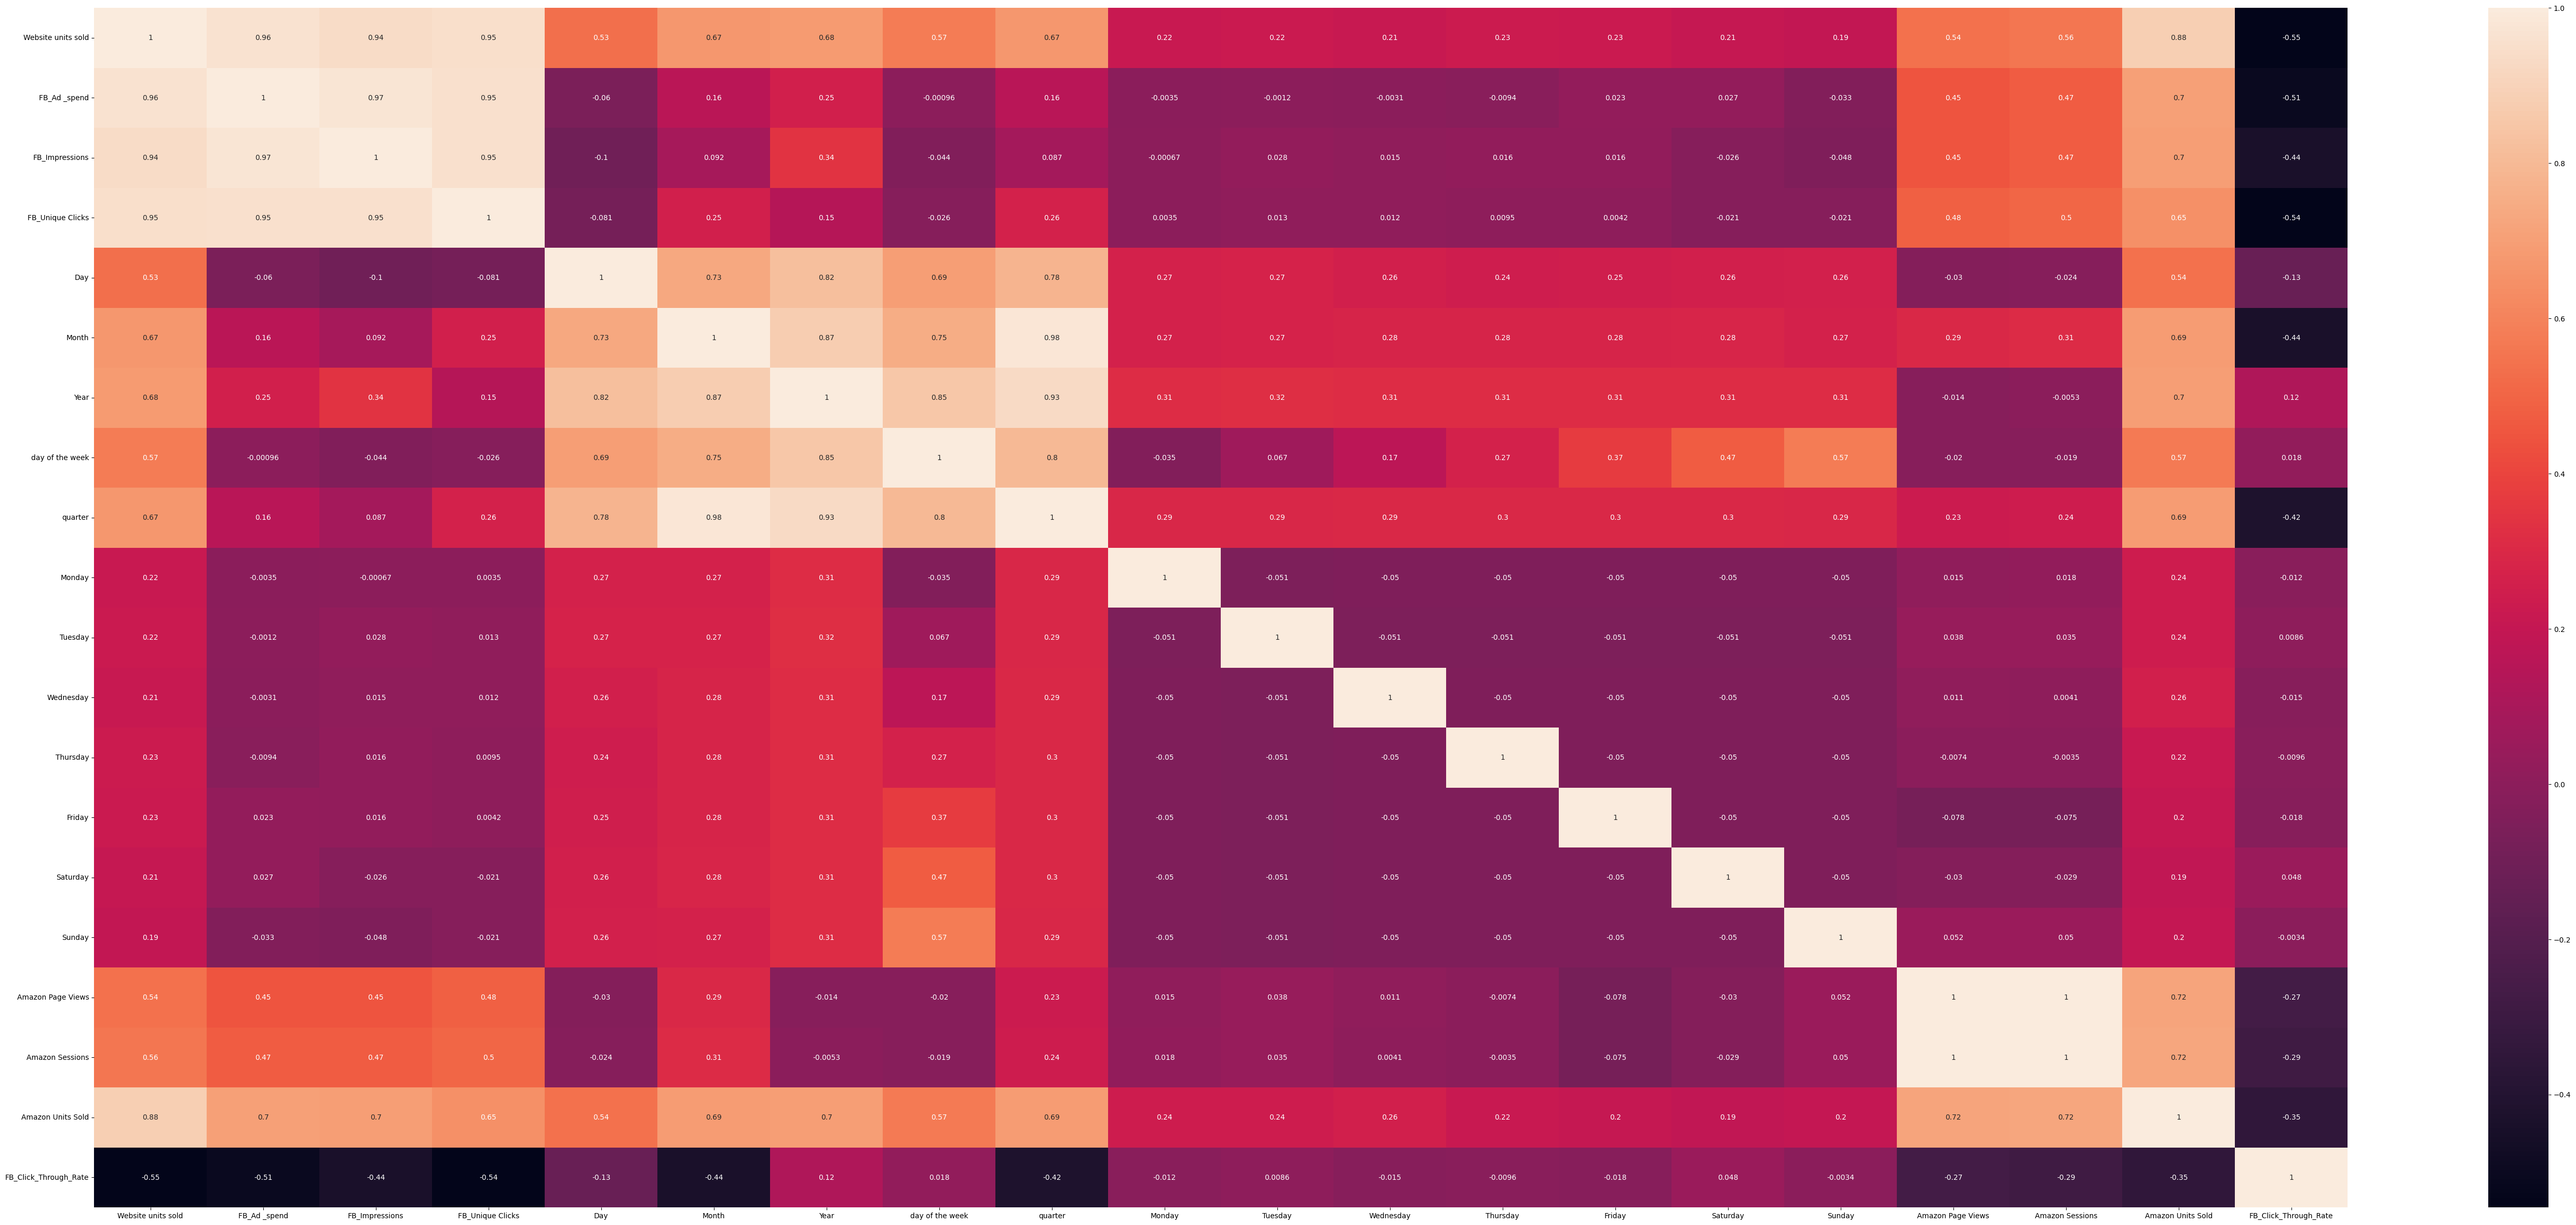

In [38]:
plt.figure(figsize= (70,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

Amazon sales  has a high correlation with fb spend/impression/clicks and also Amazon clicks/impressions

Let's check the scatterplot as well

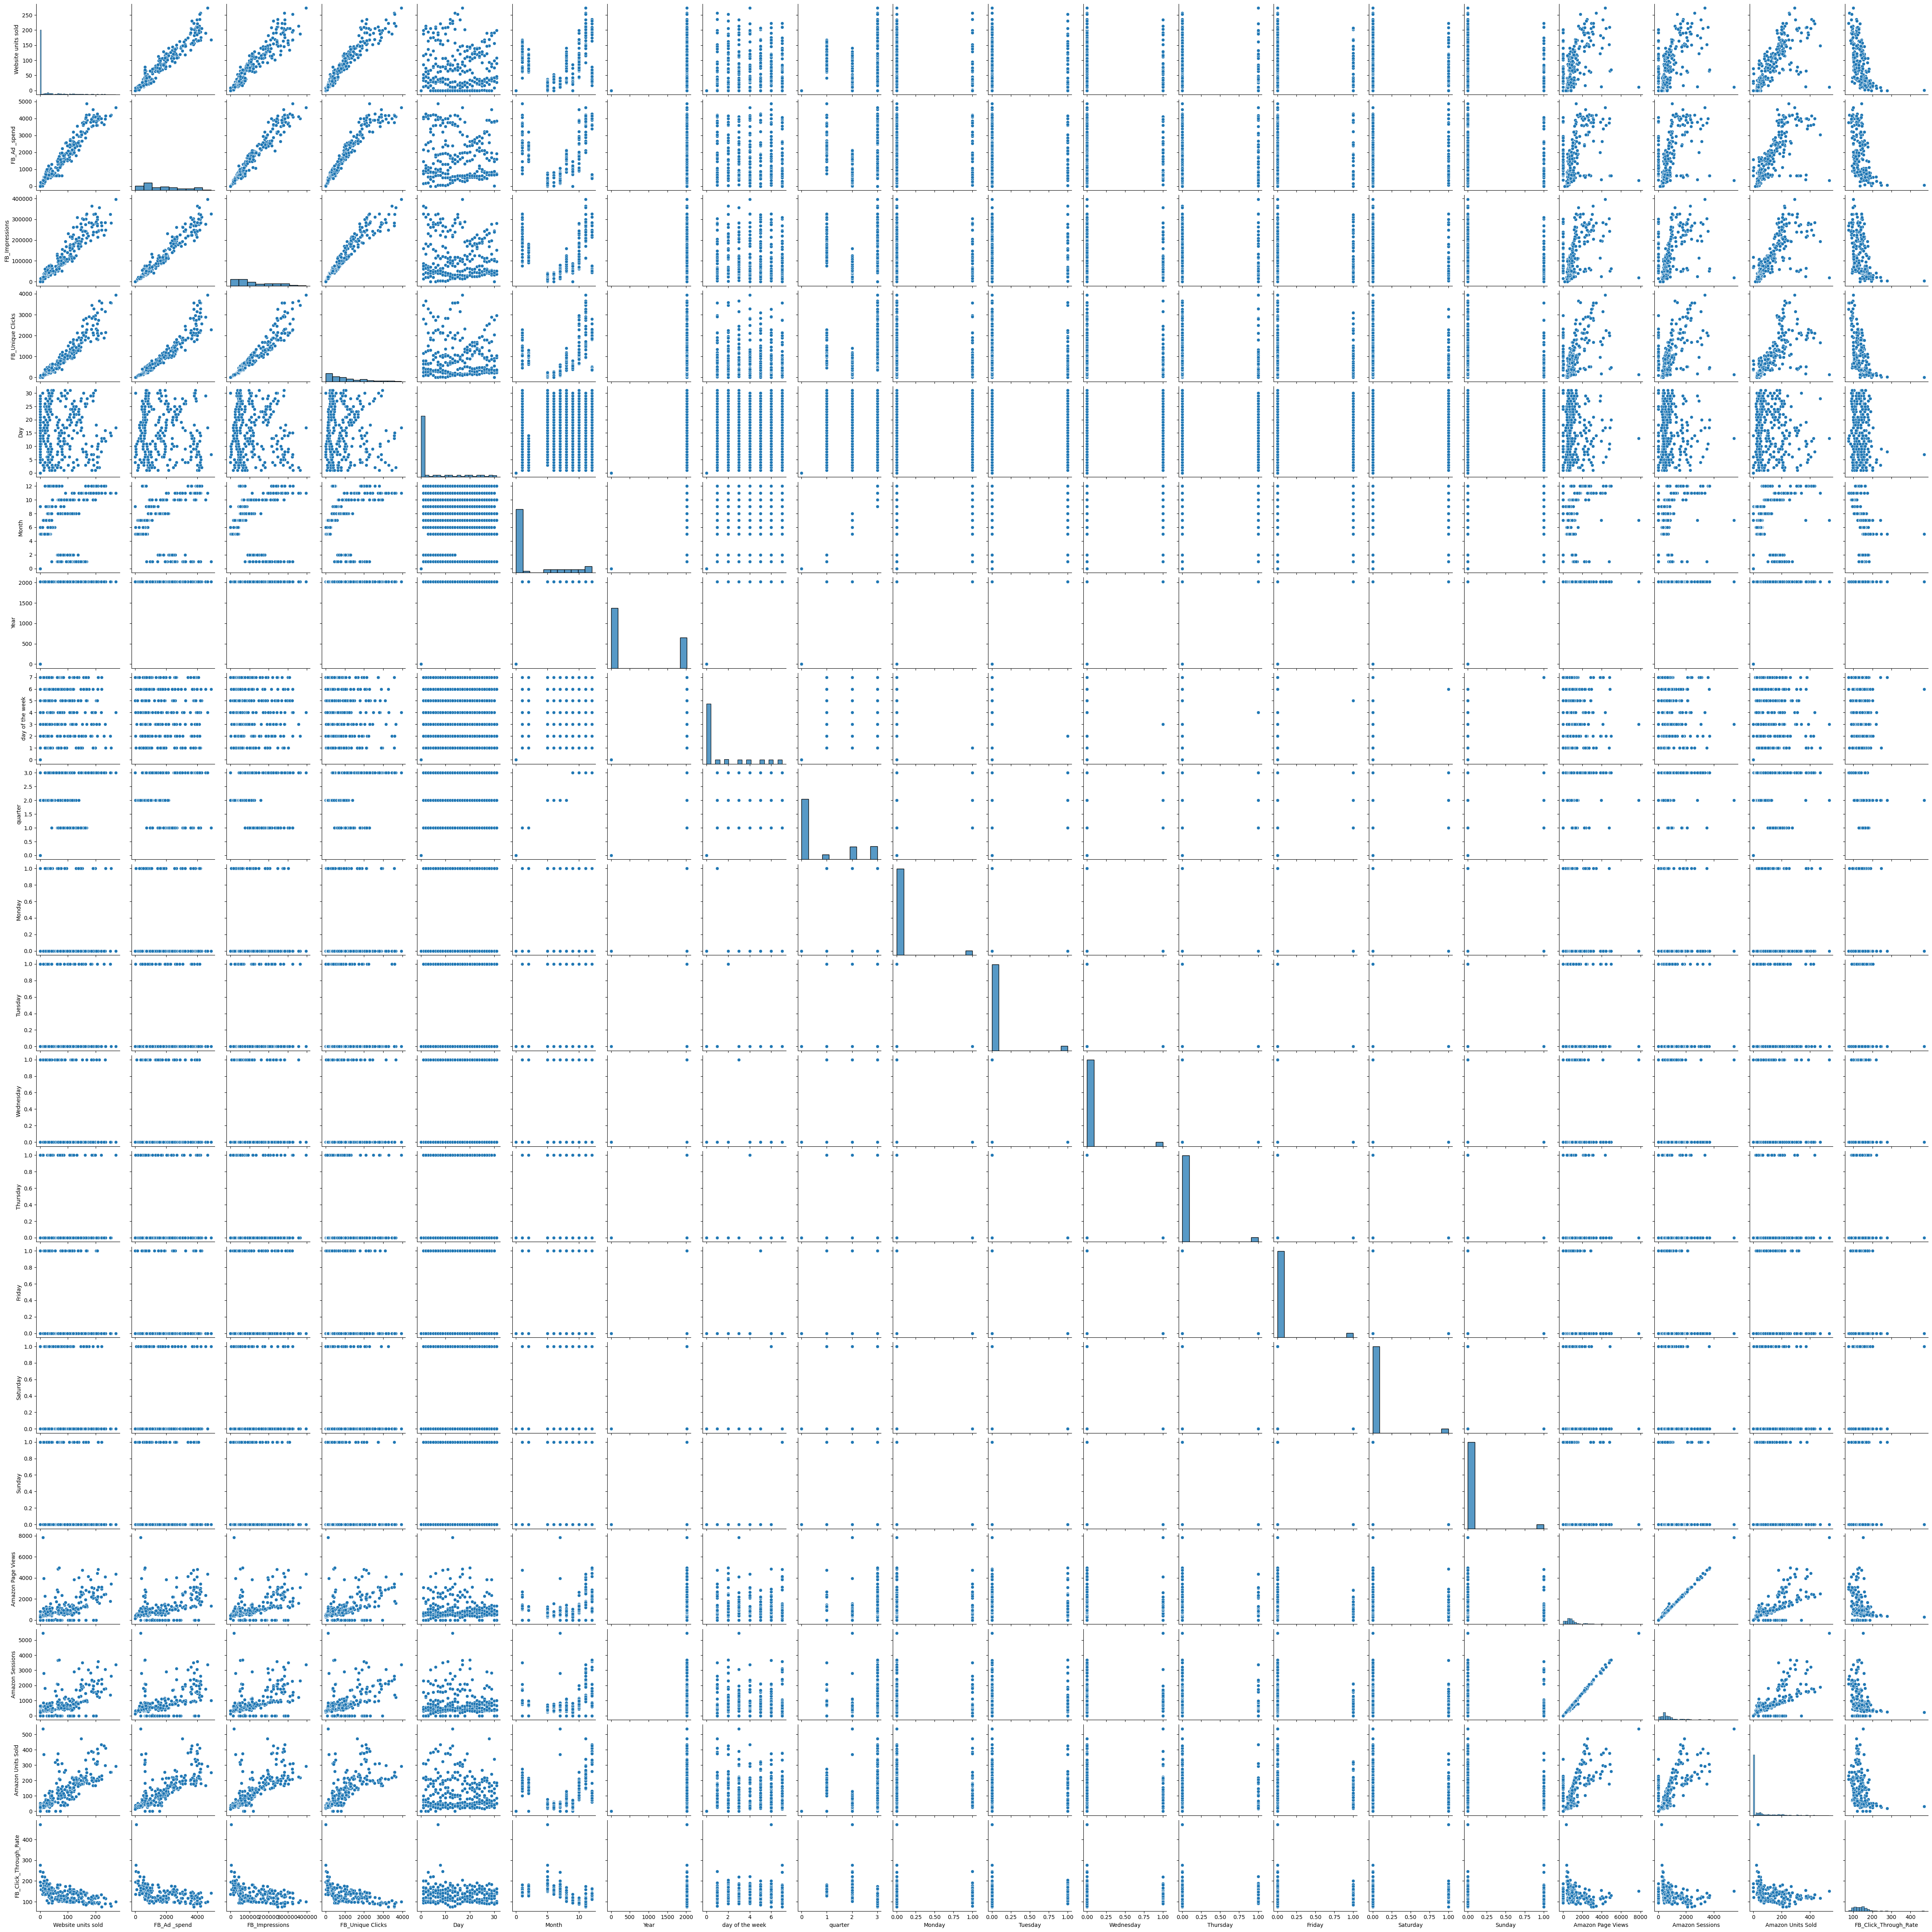

In [39]:
sns.pairplot(df)

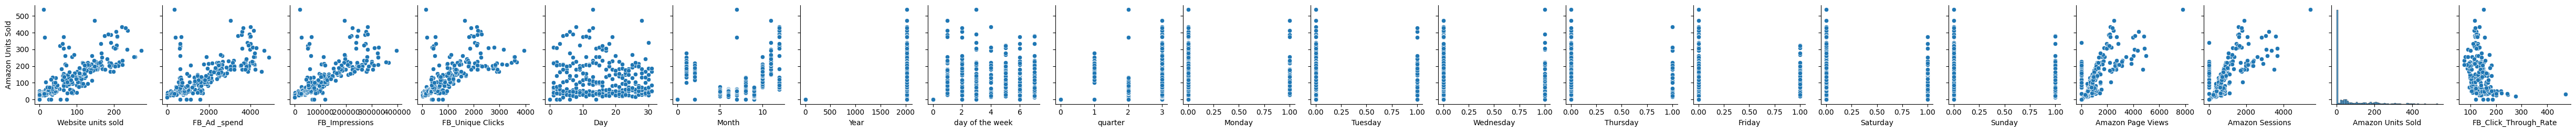

In [40]:
sns.pairplot(df,kind = "scatter",y_vars='Amazon Units Sold',aspect=1)

It reinstates the fact we learned.

In [41]:
feature = df.drop(columns='Amazon Units Sold').columns
x = df[feature].fillna(0)
print("Check for NaN values in independent variable",x.isnull().values.any())
y = df['Amazon Units Sold']
print("Check for NaN values in independent variable",y.isnull().values.any())

Check for NaN values in independent variable False
Check for NaN values in independent variable False


In [42]:
mlr = LinearRegression()
mlr.fit(x,y)

LinearRegression()

In [43]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

-1.37603706207301e-10


[('Website units sold', 0.8866840033275453),
 ('FB_Ad _spend', 0.006337953311326952),
 ('FB_Impressions', 0.0005950492666820281),
 ('FB_Unique Clicks', -0.09470392415930612),
 ('Day', -0.1811329357472145),
 ('Month', 14.700915679680254),
 ('Year', 115.93443540819985),
 ('day of the week', -46571.39090883767),
 ('quarter', -0.6526746581087014),
 ('Monday', -187938.67646628869),
 ('Tuesday', -141376.1728476866),
 ('Wednesday', -94792.32413246755),
 ('Thursday', -48233.1975365805),
 ('Friday', -1661.6435694378085),
 ('Saturday', 44902.11077240422),
 ('Sunday', 91474.99243219491),
 ('Amazon Page Views', 0.21456780198748035),
 ('Amazon Sessions', -0.23921262559254838),
 ('FB_Click_Through_Rate', -0.009887322012203574)]

In [44]:
y_pred_mlr = mlr.predict(x)

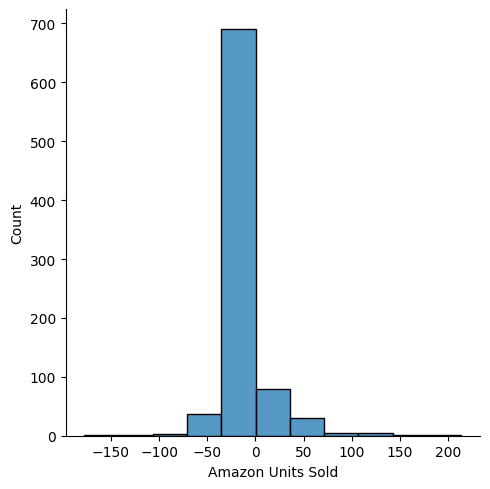

In [45]:
mlr = pd.DataFrame({'Actual value': y, 'Predicted value': y_pred_mlr})
residual = pd.Series( y - y_pred_mlr)
sns.displot(residual)

In [46]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 10.404708441313188
Mean Square Error: 637.0740969347348
Root Mean Square Error: 25.2403267992856


In [47]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\pranay.goyal\virtualenv\venv1\Lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\pranay.goyal\AppData\Local\Temp\ipykernel_23700\2741202670.py", line 2, in <module>
    print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))
                                                        ^^^^^^^^^
  File "c:\Users\pranay.goyal\virtualenv\venv1\Lib\site-packages\pandas\core\generic.py", line 5902, in __getattr__
    return object.__getattribute__(self, name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'DataFrame' object has no attribute 'score'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\pranay.goyal\virtualenv\venv1\Lib\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_t

Should I calculate p value to see if each of the coefficient is significant?